# Assessing Regression models in Python.

The process of applying equations for $R^2$, standard errors, and the 95% confidence intervals around the slope are all done for us in Python. In fact, without asking, Python gives us these statistics in the regression output. To have a first look, we will come back to the immigration attitudes data from last week’s tutorial. 


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ESS data

Let's work again with the European Social Survey data (attitudes to immigration)

### Import and view data

In [2]:
# load and view the data
ess = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/immigrationData.csv')
ess

,1,vote,better,bornuk,sex,age,educ
0,2,Conservative,0.0,0,Male,75.0,NaN
1,3,Conservative,7.0,0,Male,70.0,Upper secondary
2,4,Conservative,8.0,0,Female,54.0,Tertiary
3,5,Conservative,0.0,0,Male,58.0,Upper secondary
4,6,Conservative,7.0,0,Male,76.0,Lower secondary
...,...,...,...,...,...,...,...
2199,2201,NaN,9.0,0,Female,32.0,Tertiary
2200,2202,NaN,5.0,0,Female,69.0,Lower secondary
2201,2203,NaN,5.0,0,Female,34.0,Upper secondary
2202,2204,NaN,2.0,0,Male,23.0,Lower secondary


We’ll fit a regression model just like we did last week. 

In [3]:
# Fit a regression model: Y = better, x1 = age, x2, = sex, x3 = education, x4 = bornuk.

# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + educ + bornuk')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     65.72
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           6.87e-64
Time:                        14:10:49   Log-Likelihood:                -4775.5
No. Observations:                2097   AIC:                             9563.
Df Residuals:                    2091   BIC:                             9597.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.2565      0.200     26.269      0.000       4.864       5.649
sex[T.Male]                 0.0390      0.104      0.375      0.707      -0.165       0.243
educ[T.Tertiary]            1.8464      0.139     13.316      0.000       1.574       2.118
educ[T.Upper secondary]     0.6699      0.127      5.274      0.000       0.421       0.919
age                        -0.0118      0.003     -4.056      0.000      -0.017      -0.006
bornuk                      1.1811      0.155      7.636      0.000       0.878       1.484
==============================================================================
Omnibus:                       44.928   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.767
Skew:                          -0.354   Prob(JB):                     6.99e-11
Kurtosis:                       2.818   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Have a good look at the contents of the output table above 

* Find the standard error. 
* Find the lower and upper confidence interval. 

Answer the quick questions:

1. What is the slope for age, and what are the confidence intervals around the slope? How would you interpret these confidence intervals in words?

    * $b$ = -.0117951, the 95% confidence intervals are -.0174981 and -.0060921 meaning that we can be 95% confident that the true population value lies between these two points. The lower and upper confidence bounds are below zero, so we can be sure the slope is statistically significant.
    
    
2. What other information in the table can tell us the slope is statistically significant?

    * The standard error of .002908 can be used to give the $t$-statistic. -.0117951/.002908 = -4.06. As this $t$ value is larger than 1.96, we know the slope is statistically significant. The regression table also provides the $p$-value associated with this $t$-statistic. So, there are several ways to know if the slope is statistically significantly different to zero. 
    
    
3. For all the $x$-variables in this model, find the one(s) that are not statistically significant. 
    * In this model, the variable for sex is not significant. There is no difference in immigration attitudes between men and women. 
    
    
4. What is the $R^2$ for this model, and how do we interpret it? 
    * $R^2$ = 0.1358 meaning that 13.6% of the variability in $y$ is explained by these $x$s. 
    
    
5. Remember the model with political party? Do you think the $R^2$ in this model will be higher or lower? Let’s take a look. 

In [4]:
# Code to run a regression. Y = better, x1 = age, x2, = sex, x3=vote x4 = age*vote.

# first we run this line to tell statsmodels where to find the data and the explanatory variables
reg_formula = sm.regression.linear_model.OLS.from_formula(data = ess, formula = 'better ~ age + sex + vote + age:vote')

# then we run this line to fit the regression (work out the values of intercept and slope)
# the output is a structure which we will call reg_results
reg_results = reg_formula.fit()

# let's view a summary of the regression results
reg_results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 better   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     20.77
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.71e-23
Time:                        14:10:49   Log-Likelihood:                -3444.4
No. Observations:                1511   AIC:                             6903.
Df Residuals:                    1504   BIC:                             6940.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    6.9235      0.464     14.909      0.000       6.013       7.834
sex[T.Male]                  0.0403      0.123      0.329      0.742      -0.200       0.281
vote[T.Conservative]        -0.6885      0.589     -1.170      0.242      -1.843       0.466
vote[T.Labour]               1.1944      0.564      2.119      0.034       0.089       2.300
age                         -0.0145      0.008     -1.823      0.068      -0.030       0.001
age:vote[T.Conservative]    -0.0033      0.010     -0.332      0.740      -0.023       0.016
age:vote[T.Labour]          -0.0213      0.010     -2.133      0.033      -0.041      -0.002
==============================================================================
Omnibus:                       41.378   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.572
Skew:                          -0.403   Prob(JB):                     3.46e-10
Kurtosis:                       2.796   Cond. No.                         951.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared for this model is 0.076 meaning that we have now explained around 7.6% of the variation in y, i.e., less than in our first model.

### RMSE

We don't have RMSE (root mean squared error) in our summary table, but we can call the MSE from the larger results structure, and get its square root as follows:

In [5]:
reg_results.mse_resid**0.5

2.3700920022336636

We could compare the RMSE for this regression model to the RMSE we calculated when we only had a single explanatory variable, age (which we did by hand in the section on conditional distributions)

With only age used as an explanatory variable, RMSE was a bit higher, 2.50

* What does this suggest about spread of values around the regression line?

## Checking regression assumptions

In Python, we can also examine the regression assumptions. We can explore:

* whether the data are suitably linear
* whether there is heteroskedasticity in the residuals
* whether the residuals are normally distributed

For now, let's just take a look at the last of these three assumptions and plot a histogram of the residuals:

/opt/anaconda3/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


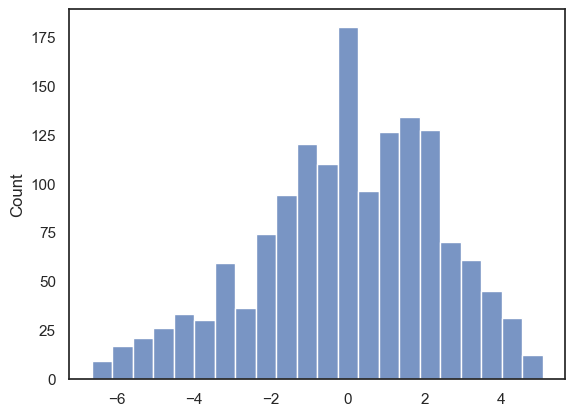

In [6]:
sns.histplot(reg_results.resid)
plt.show()

The residuals look roughly normally distributed. It looks like the normality assumption has been met